In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('NewLRTests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [3]:
print(data['var'])
print()
print(data['order'])
print()
for key in data['data'][list(data['data'].keys())[0]].keys():
    print(key)

{'reclusterThreshold': [0.05, 0.1], 'localRecluster': [0, 1, 2, 3, 63, 123, 183], 'clusterSearchThresh': [0, 3, 8], 'globalRecluster': [-1, 0, 1], 'CHBatteryDropThresh': [0.15, 0.2, 0.3], 'clusteringOn': ['false', 'true'], 'CHTimeThresh': [180, 300, 450, 600, 900]}

['globalRecluster', 'reclusterThreshold', 'clusteringOn', 'localRecluster', 'clusterSearchThresh', 'CHBatteryDropThresh', 'CHTimeThresh']

Samples
CS Joins
Clusters above thresh
# False Positive = Confirmations
# True Positive = Rejections
Lost readings
Alive valid nodes
# False Positive Wind
# False Negatives
True Positive Readings
BTLocalRecluster
Global reclusters
Cluster searches
Min Battery
Clusters below thresh
BTGlobalRecluster
# False Positive Confirmations
Avg cluster size
# Total False Negatives
True Positive Findings
BTReadings
Max Battery
Detection Time
Average Battery
BTClusterSearch
Local Reclusters
# False Positives
Waits
CS Solos
Recluster threshold
# False Negatives Drift
Alone nodes
Recluster period
# Fals

In [7]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'CS', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh'}

In [4]:
i = 0
print(len(data['data'].keys()))

631


In [2]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [10]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(currentLevel-separationLevel):
                if titleArr[i] in inputDict:
                    label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

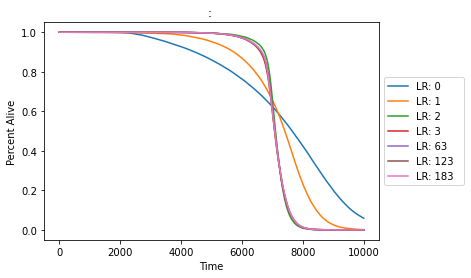

In [11]:
Alive = compareOverTime('Percent Alive', [3], {2:['false'], 0:[-1], 4:[0]})
generateOverTimeGraphs(Alive, 0)

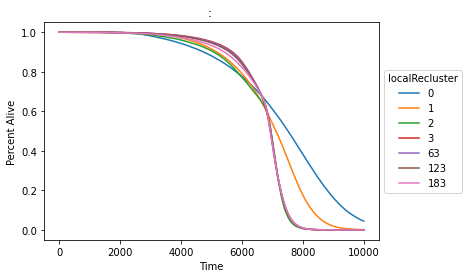

In [55]:
Alive = compareOverTime('Percent Alive', [3], {2:['false'], 0:[-1], 4:[]})
generateOverTimeGraphs(Alive, 0)

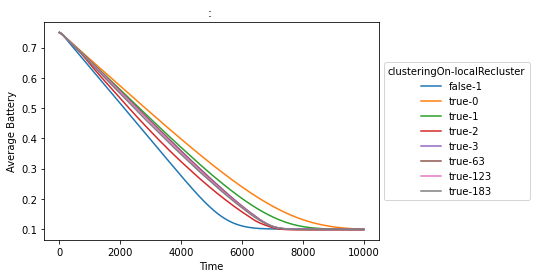

In [19]:
AvgBattery = compareOverTime('Average Battery', [2,3])
generateOverTimeGraphs(AvgBattery, 0)

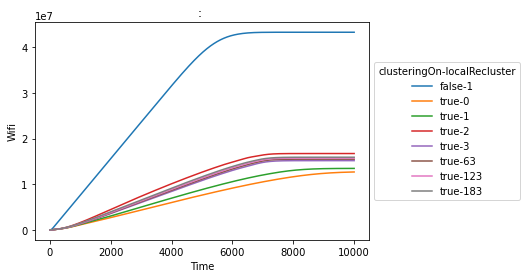

In [28]:
Wifi = compareOverTime('Wifi', [2,3])
generateOverTimeGraphs(Wifi, 0)

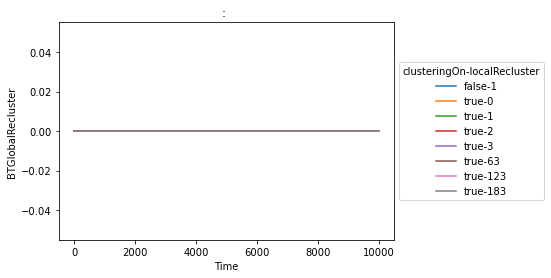

In [29]:
BTGlobalRecluster = compareOverTime('BTGlobalRecluster', [2,3])
generateOverTimeGraphs(BTGlobalRecluster, separationLevel=0)

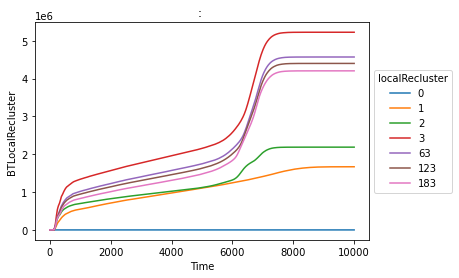

In [31]:
BTLocalRecluster = compareOverTime('BTLocalRecluster', [3], {2:['false']})
generateOverTimeGraphs(BTLocalRecluster, separationLevel=0)

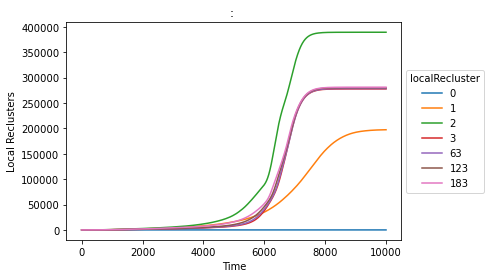

In [26]:
LRs = compareOverTime('Local Reclusters', [3], {2:['false']})
generateOverTimeGraphs(LRs, separationLevel=0)

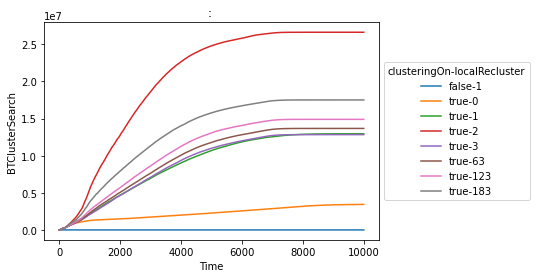

In [20]:
BTClusterSearch = compareOverTime('BTClusterSearch', [2,3])
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

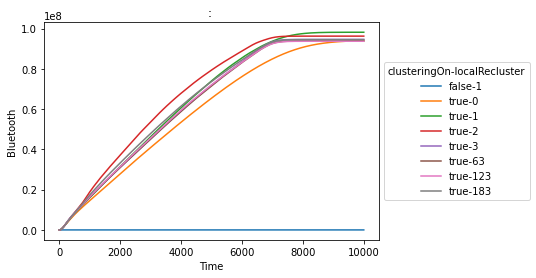

In [7]:
BT = compareOverTime('Bluetooth', [2,3])
generateOverTimeGraphs(BT, separationLevel=0)

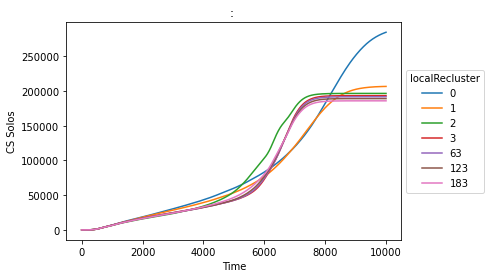

In [25]:
CSSolos = compareOverTime('CS Solos', [3], {2:['false']})
generateOverTimeGraphs(CSSolos, separationLevel=0)

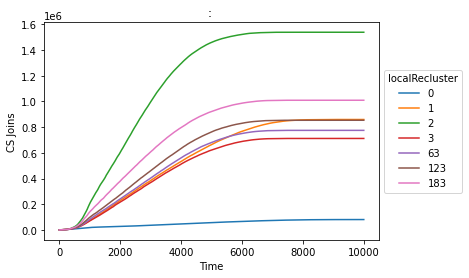

In [24]:
CSJoins = compareOverTime('CS Joins', [3], {2:['false']})
generateOverTimeGraphs(CSJoins, separationLevel=0)

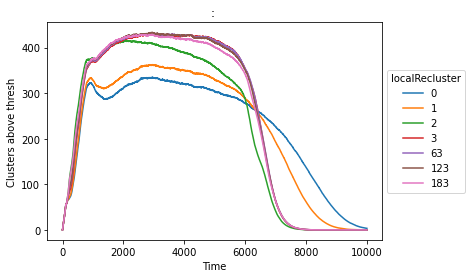

In [23]:
above = compareOverTime('Clusters above thresh', [3], {2:['false']})
generateOverTimeGraphs(above, separationLevel=0)

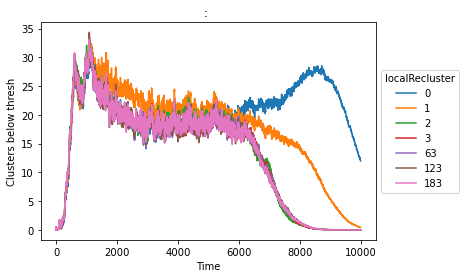

In [35]:
below = compareOverTime('Clusters below thresh', [3], {2:['false'], 0:[-1]})
generateOverTimeGraphs(below, separationLevel=0)

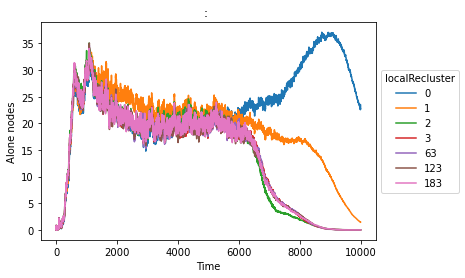

In [33]:
alone = compareOverTime('Alone nodes', [3], {2:['false'], 0:[-1]})
generateOverTimeGraphs(alone, separationLevel=0)

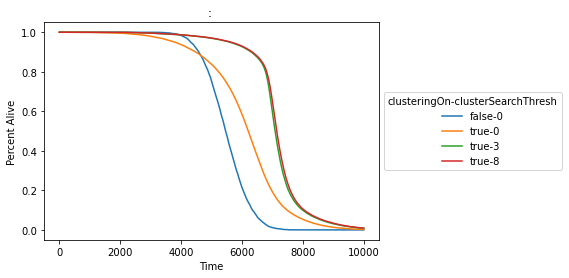

In [45]:
Alive = compareOverTime('Percent Alive', [2,4], {0:[-1]})
generateOverTimeGraphs(Alive, 0)

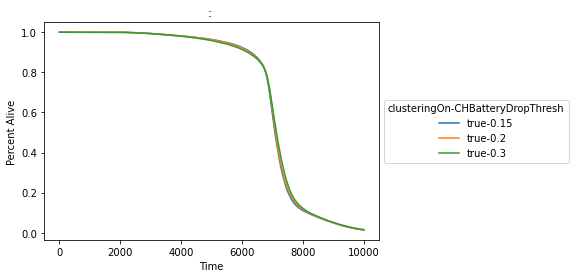

In [68]:
Alive = compareOverTime('Percent Alive', [2,5], {0:[-1], 4:[]})
generateOverTimeGraphs(Alive, 0)

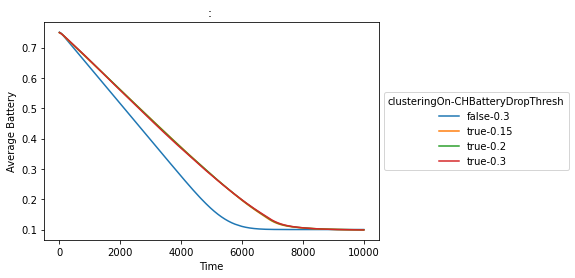

In [58]:
AvgBattery = compareOverTime('Average Battery', [2,5], {0:[-1]})
generateOverTimeGraphs(AvgBattery, 0)

In [1]:
Alive = compareOverTime('Percent Alive', [2,6], {0:[-1], 4:[0]})
generateOverTimeGraphs(Alive, 0)

NameError: name 'compareOverTime' is not defined

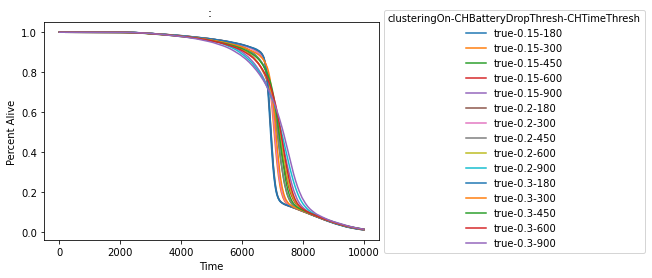

In [65]:
Alive = compareOverTime('Percent Alive', [2,5,6], {0:[-1], 4:[0], 3:[1,2,3]})
generateOverTimeGraphs(Alive, 0)

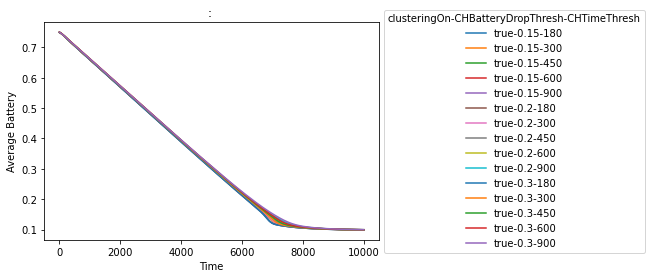

In [66]:
AvgBattery = compareOverTime('Average Battery', [2,5,6], {0:[-1], 4:[0]})
generateOverTimeGraphs(AvgBattery, 0)

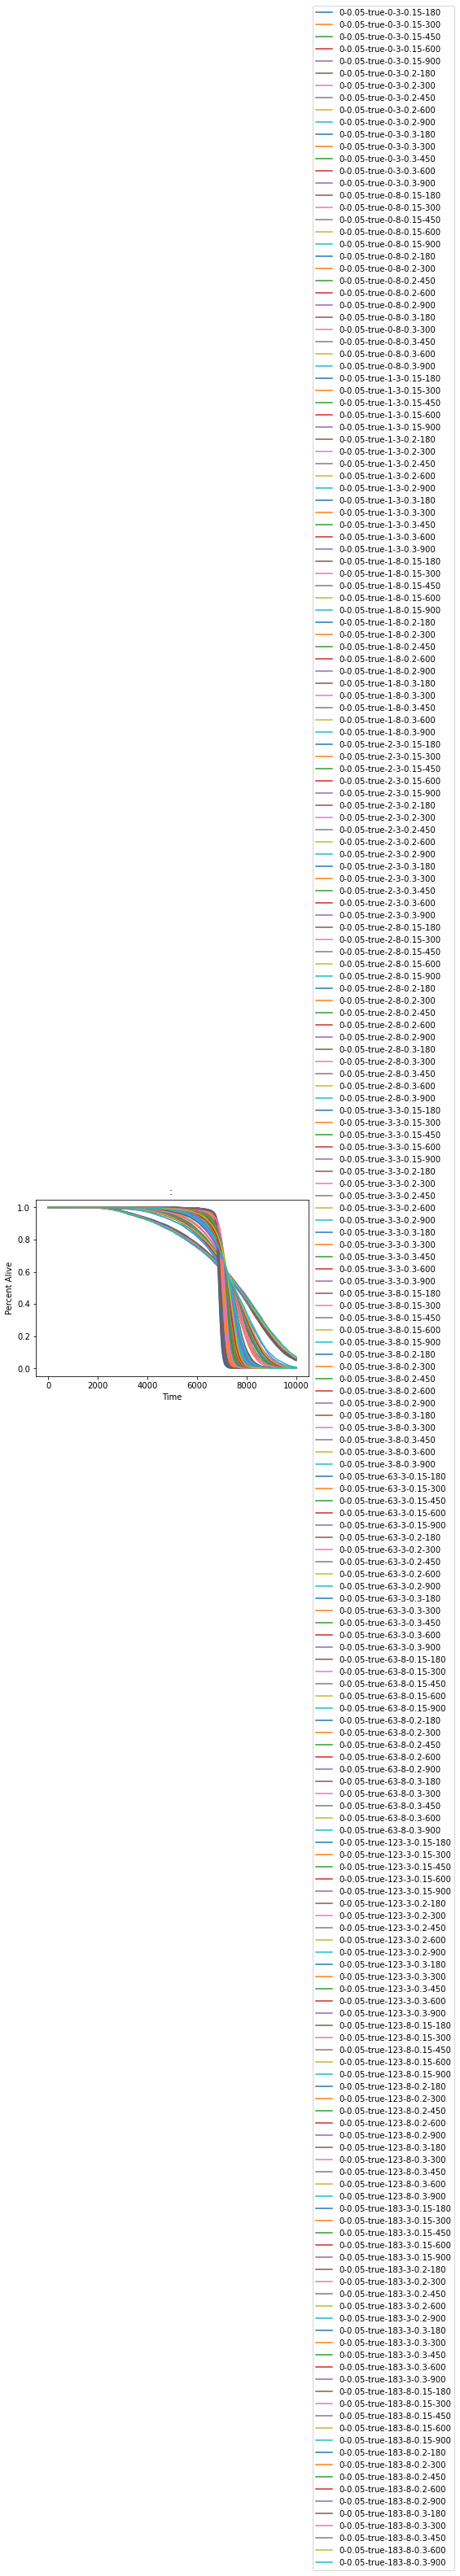

In [76]:
Alive = compareOverTime('Percent Alive', [0,1,2,3,4,5,6], {0:[-1], 4:[0]})
generateOverTimeGraphs(Alive, 0)